## Практическая работа

**Цели работы**

Научиться улучшать модель, подбирая/добавляя параметры модели.

**Что нужно сделать**

В рамках данной практической работы необходимо:
- Повторить все четыре этапа: от загрузки данных до деления выборки на обучающую и тестовую
- Обучить модели с новыми параметрами 
- Вывести качество модели
- Сравнить полученную модель с моделью, показанной в видео

Результатом практической работы является полноценный ноутбук с решением задачи классификации спама.

**Рекомендации по выполнению**

- Выполняйте задания в приведенной последовательности
- Пользуйтесь материалами, расказанными в видео
- Используйте [документацию модели](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
- Попробуйте использовать параметр alpha

**Что оценивается**

- Ноутбук содержит полноценную модель
- Получена модель с лучшим качеством, чем была показана в примере

## Решение

In [1]:
# расширяем поле ноутбука для удобства
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [3]:
import nltk
from nltk.stem import PorterStemmer

In [4]:
df = pd.read_table(
    './data/SMSSpamCollection',
    sep='\t', 
    header=None,
    names=['label', 'message'])

FileNotFoundError: [Errno 2] No such file or directory: './data/SMSSpamCollection'

In [ ]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})
df['message'] = df.message.map(lambda x: x.lower())
df['message'] = df.message.str.replace('[^\w\s]', '')
df['message'] = df['message'].apply(nltk.word_tokenize)

In [ ]:
stemmer = PorterStemmer()
df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])
df['message'] = df['message'].apply(lambda x: ' '.join(x))

In [ ]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])

transformer = TfidfTransformer().fit(counts)
counts = transformer.transform(counts)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    counts, df['label'], test_size=0.1, random_state=69)

## Модель с параметрами

In [ ]:
# обучение модели
model = MultinomialNB(alpha = 0.7).fit(X_train, y_train)

In [ ]:
submission = pd.DataFrame()
submission['real'] = y_test
submission['proba'] = model.predict_proba(X_test)[:, 1]

submission.head(5)

,real,proba
3444,0,0.02
378,0,0.00
3330,0,0.13
4606,0,0.00
2050,0,0.03


### Увеличили скор (было 0.9849)

In [ ]:
# метрика для вероятностей
roc_auc_score(submission['real'], submission['proba'])

0.9882343306398776

In [ ]:
submission2 = pd.DataFrame()
submission2['real'] = y_test
submission2['proba'] = model.predict(X_test)

submission2.head(5)

,real,proba
3444,0,0
378,0,0
3330,0,0
4606,0,0
2050,0,0


### Уменьшили кол-во ошибок 2 рода (было 29)

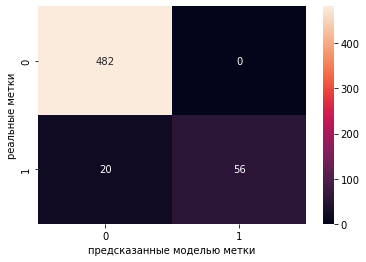

In [ ]:
# метрика для меток
cf_matrix = confusion_matrix(submission2['real'], submission2['proba'])

ax = sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set(xlabel='предсказанные моделью метки', ylabel='реальные метки');